Code to extract the frequency estimates from the no byzantine with varied white tiles test

In [34]:
import os
import random

import numpy as np
import pandas as pd
from jedi.api import file_name

# folder_names = ["experiment_test1"]
number_of_experiments = 40
number_of_robots = 20
#In this context, an experiment refers to a set of 10 (subject to change) runs of the simulation with that config

harm_df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/no_byzantine_0.75/no_byzantine75.csv")

# harm_diff = harm_df.median() #putting loads of shit on the end for some reason
harm_diff = 1.780535

print(harm_df)
print(harm_diff)


def get_estimates_from_experiment(folder_names, number_of_experiments, number_of_robots, file_name, experiment_name):
    estimate_df = pd.DataFrame()
    for folder_name in folder_names:
        estimate_list = []
        path_to_data = experiment_name + folder_name + "/"
        for i in range(1,number_of_experiments):
            folder_number = str(i).zfill(3)
            robot_picked = random.randint(1,number_of_robots)
            path_to_robot = path_to_data + folder_number + "/" + str(robot_picked) + "/" + "sc.csv"

            df = pd.read_csv(path_to_robot, sep=" ")
            if "Estimate" in df.columns:
                #Need to filp it, have the actual percentages as the col names
                # last_estimate = df["Estimate"].iloc[-1]
                # difference = 100 * (abs(last_estimate - 0.75))
                difference = df["TIMESTAMP"].iloc[-1]
                estimate_list.append(difference)

                # new_row = pd.DataFrame([[folder_name, last_estimate]], columns=estimate_df.columns)
                # estimate_df = pd.concat([estimate_df, new_row], ignore_index=True)
        estimate_df[folder_name] = estimate_list

    print(os.getcwd())
    print(estimate_df)
    estimate_df.to_csv(file_name + ".csv", index=False)

folder_names = ["1","2","3","4","5","6","7","8"]
# folder_names = ["1"]


get_estimates_from_experiment(folder_names, number_of_experiments, number_of_robots, "Consensus_time_byzantine","collected_results/byzantine_03_40/byzantine_03_40_")

          1
0  1.318000
1  2.088070
2  2.379649
3  3.918772
4  0.467895
5  1.473000
6  0.969500
7  2.928947
1.780535
/home/zak-22/arg/toychain-argos/HelloNeighbor/results
       1     2     3     4     5     6     7     8
0    801   801   801   801  1401  1101  1401  1401
1    801   801   801   801  1101  1101  1101   801
2    801   501   801   801  1101  1101  1101  1401
3    501   801   801   801   801  1101  1401  1101
4    801   801   801   801  1101  1101  1101  1401
5    801   501  1101  1101  1101   801   801  1101
6    801  1101   801   801   801  1401   801  1401
7    801   801   801   801   801  1401  1401  1401
8    801   501   801   801   801  1101  1101  1701
9    801   801   801   801   801   801   801  1101
10  1101   801   801   801   801  1101   801  1101
11   801   801   801   801   201  1101  1401  1401
12   501   801   801  1101   801  1101  1101  1701
13   801   501   801   801  1101   801   801  1101
14   801  1101   801   801  1101   801  1401   801
15   801   80

Creating the box plots for the no byzantine data actual tile estimated

In [10]:
number_of_experiments = 10
number_of_robots = 20

folder_names = ["8","9","10","11","12","13","14","15","16","17","18","19"]

def get_byzantine_blocks(folder_names, number_of_experiments, number_of_robots, file_name, experiment_name):
    estimate_df = pd.DataFrame()
    for folder_name in folder_names:
        path_to_data = experiment_name + folder_name + "/"
        byzantine_blocks = []
        for i in range(1,number_of_experiments):
            folder_number = str(i).zfill(3)
            robot_picked = random.randint(1,number_of_robots)
            path_to_robot = path_to_data + folder_number + "/" + str(robot_picked) + "/" + "sc.csv"
            df = pd.read_csv(path_to_robot, sep=" ")
            if "Byzantine" in df.columns:
                for index, row in df.iterrows():
                    byzantine_blocks.append(row["Byzantine"])

        byzantine_fraction = sum(byzantine_blocks) / len(byzantine_blocks)
        estimate_df[folder_name] = [byzantine_fraction]
    print(estimate_df)
    estimate_df.to_csv(file_name + ".csv", index=False)

get_byzantine_blocks(folder_names,10,20,"byzantine_blocks","collected_results/vote_test/byzantine_")

     8    9   10       11        12        13        14       15        16  \
0  0.0  0.0  0.0  0.03125  0.151515  0.285714  0.666667  0.74359  0.742857   

         17    18        19  
0  0.742857  0.75  0.709677  


Actual percentage of white tiles vs estimate vary grid size

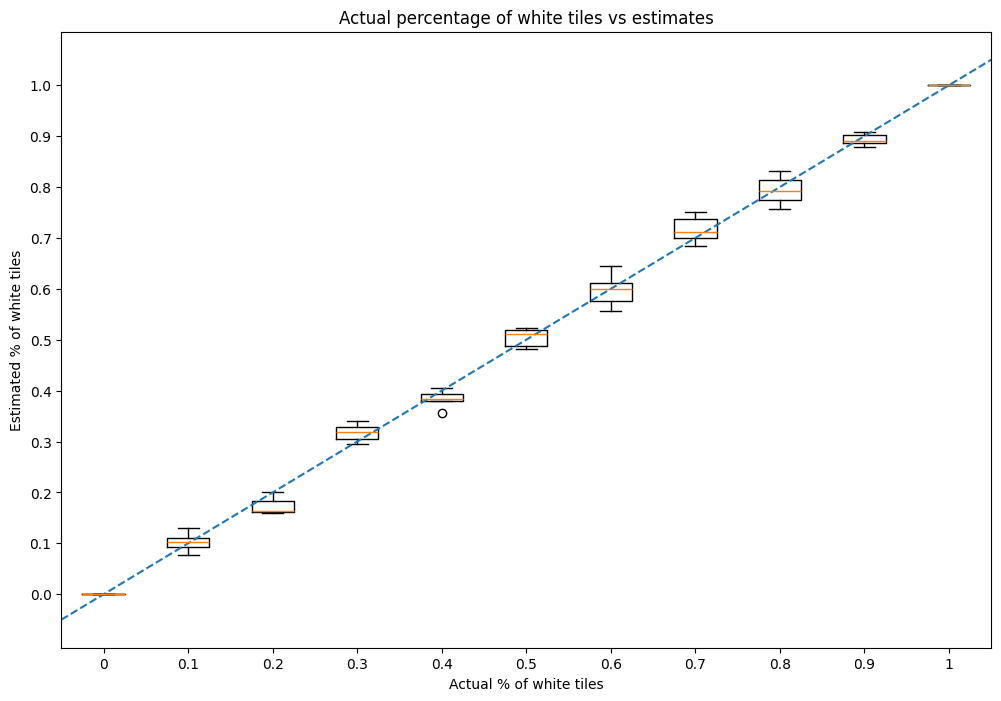

<Figure size 1200x800 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/no_byzantine/vary_tiles_no_byzantine.csv")

#df["AE"] = 100 * abs(df["Tile Percentage"] - df["Estimate"])
fig, ax = plt.subplots(figsize = (12,8))

plt.figure(figsize = (12,8))
actual_box = ax.boxplot([df[col] for col in df.columns],
            tick_labels = df.columns,
            patch_artist = False)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.plot([x_min,x_max], [y_min,y_max], "--")

ax.set_yticks([x/10 for x in range(11)])


ax.set_title("Actual percentage of white tiles vs estimates")
ax.set_ylabel("Estimated % of white tiles")
ax.set_xlabel("Actual % of white tiles")

plt.tight_layout()
plt.savefig("ActualPercentageNoByzantine.png")
plt.show()


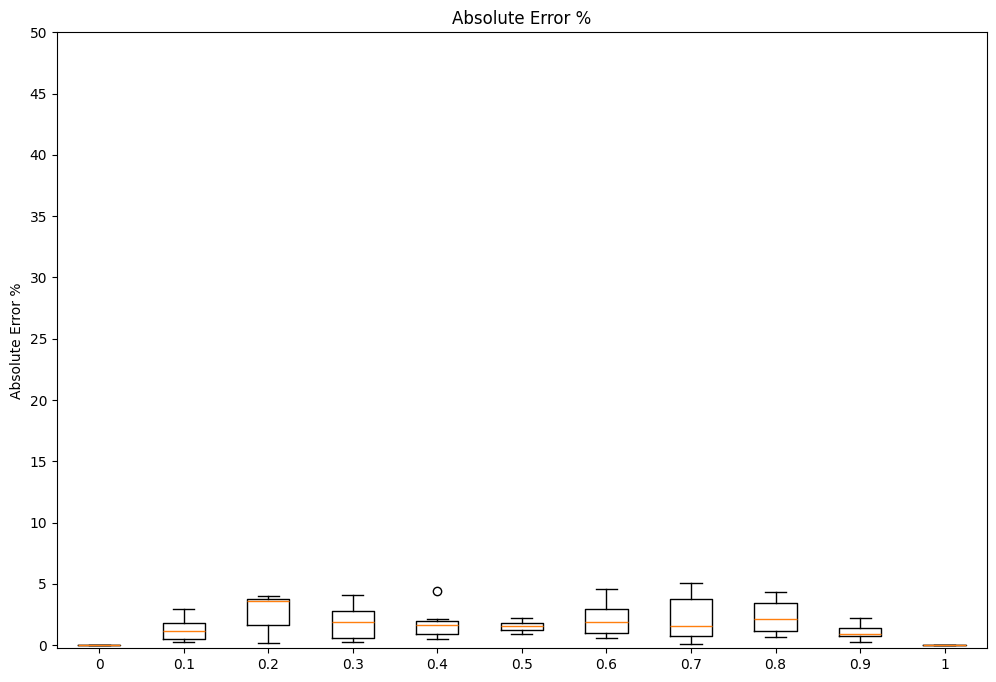

<Figure size 1200x800 with 0 Axes>

In [12]:
df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/no_byzantine/vary_tiles_no_byzantine_AE.csv")

fig, ax = plt.subplots(figsize = (12,8))

plt.figure(figsize = (12,8))
AE_box = ax.boxplot([df[col] for col in df.columns],
            tick_labels = df.columns,
            patch_artist = False)

ax.set_yticks([x for x in range(51) if x % 5 ==0])

ax.set_title("Absolute Error %")
ax.set_ylabel("Absolute Error %")
plt.savefig("AENoByzantine.png")
plt.show()


In [29]:
def plot_save_loess_byzantine(df, title, xlabel, ylabel, filename):
    plt.figure(figsize = (12,8))
    fig, ax = plt.subplots(figsize = (12,8))

    # df_3 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/byzantine_threshold0.2/byzantine_0.2.csv")
    #
    # x1 = np.arange(1, df_3.shape[1] + 1)
    # y1 = df_3.median()
    #
    # smoothed1 = lowess(y1, x1, frac=0.6)
    # ax.plot(smoothed1[:,0], smoothed1[:,1], "b-")


    x = np.arange(1, df.shape[1] + 1)
    y = df.median()

    smoothed = lowess(y, x, frac=0.6)

    ax.plot(smoothed[:,0], smoothed[:,1], "r-")


    AE_box = ax.boxplot([df[col] for col in df.columns],
                tick_labels = df.columns,
                patch_artist = False)

    ax.set_yticks([x for x in range(51) if x % 5 ==0])

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    fig.savefig(filename)
    plt.show()

<Figure size 1200x800 with 0 Axes>

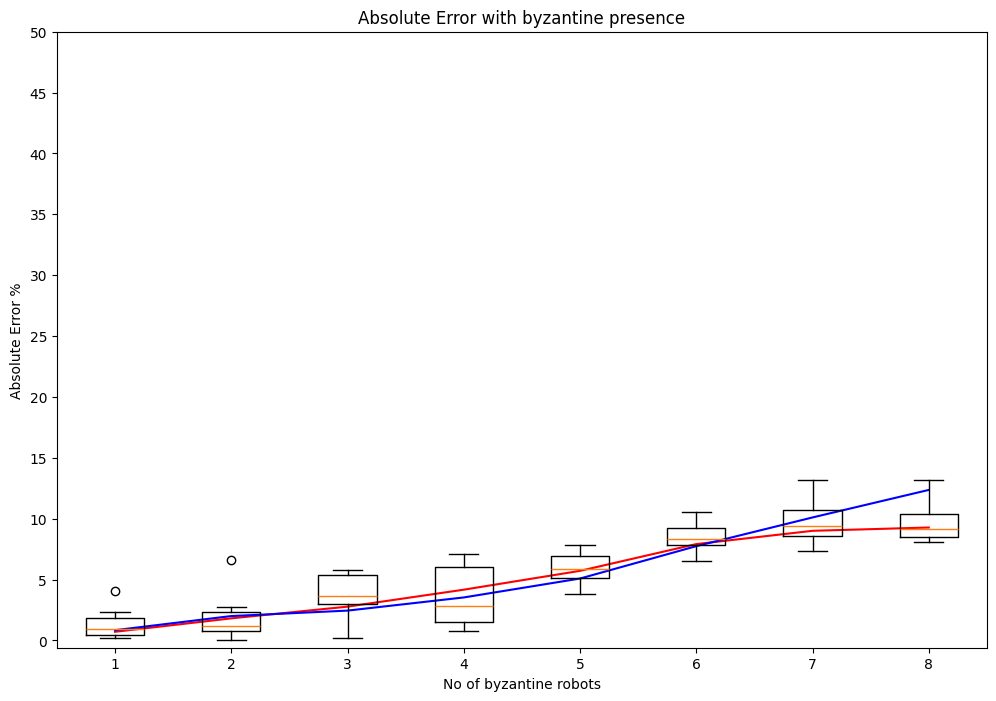

In [30]:
from statsmodels.nonparametric.smoothers_lowess import lowess

df_3 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/byzantine_threshold0.3/byzantine_0.3.csv")

plot_save_loess_byzantine(df_3,"Absolute Error with byzantine presence","No of byzantine robots","Absolute Error %","AEByzantine.png")


<Figure size 1200x800 with 0 Axes>

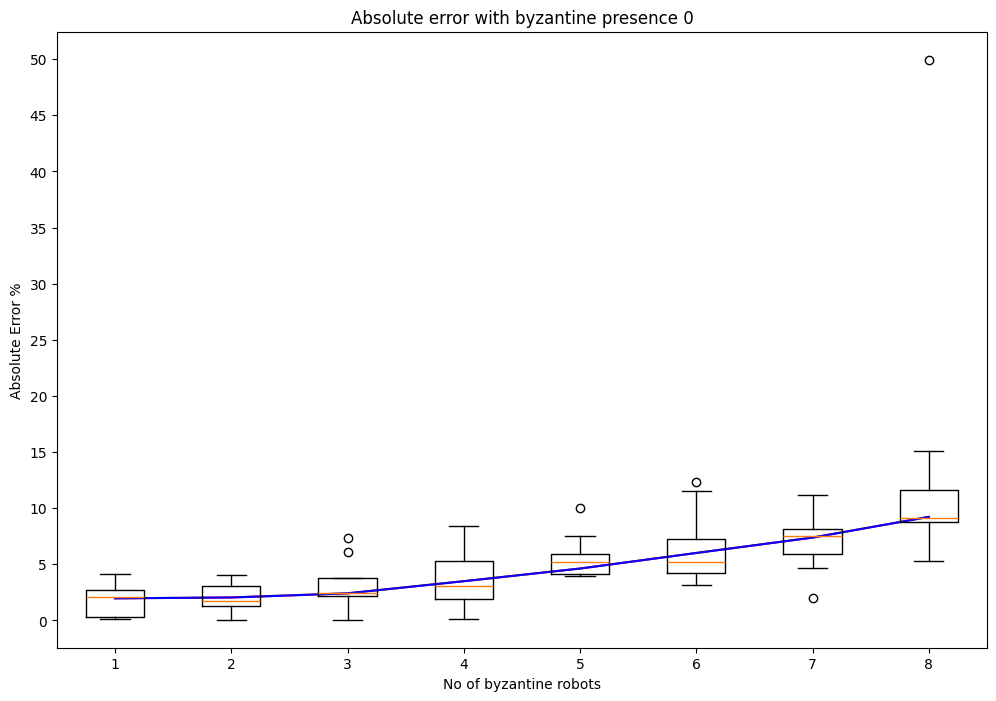

In [20]:
df_0 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/byzantine_threshold0.3_0/byzantine03_0.csv")

plot_save_loess_byzantine(df_0,"Absolute error with byzantine presence 0","No of byzantine robots", "Absolute Error %","AEByzantine0.png")


<Figure size 1200x800 with 0 Axes>

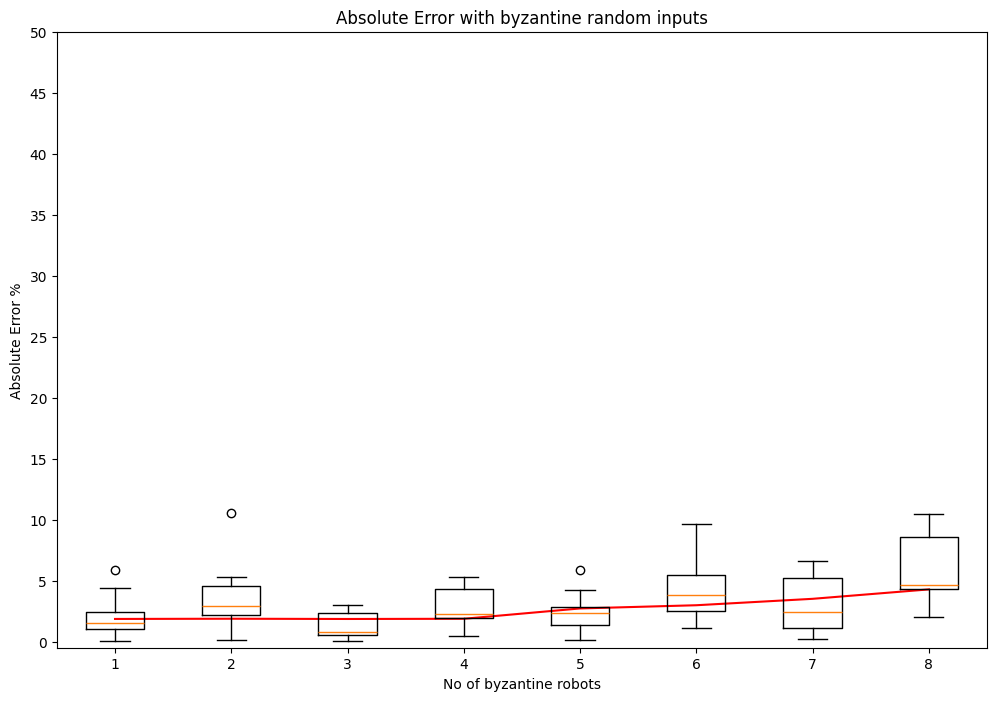

In [17]:
#Byzantine with random inputs
df_random = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/byzantine_random0.3/byzantine03Random.csv")

plot_save_loess_byzantine(df_random, "Absolute Error with byzantine random inputs","No of byzantine robots","Absolute Error %", "AEByzantine.png")


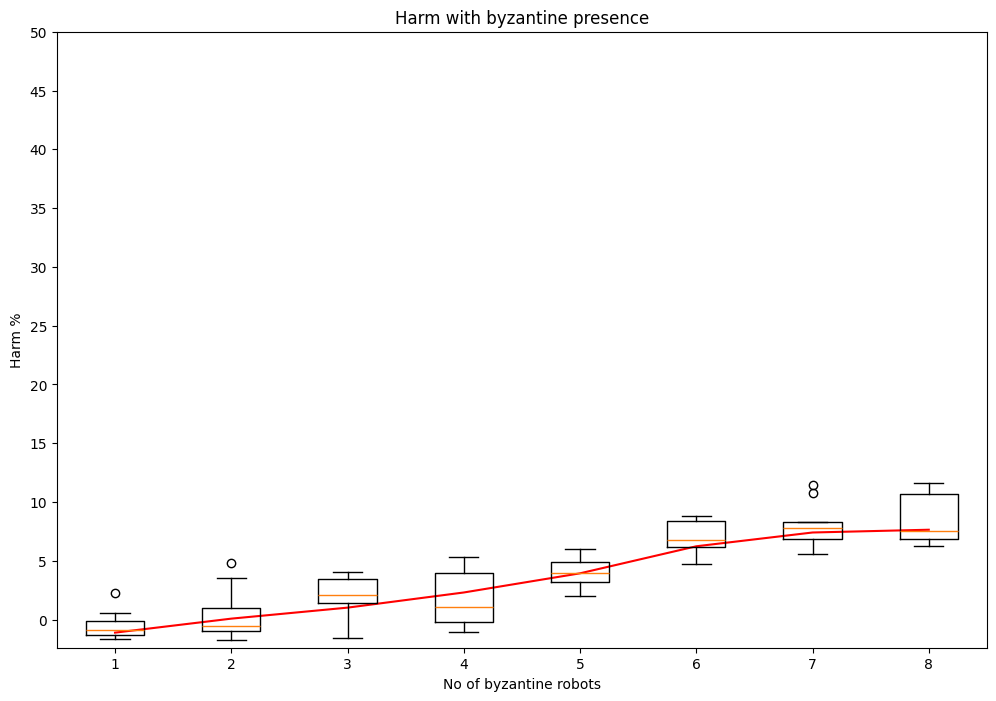

<Figure size 1200x800 with 0 Axes>

In [16]:
df_3_harm = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/byzantine_threshold0.3/byzantine03Harm.csv")

fig, ax = plt.subplots(figsize = (12,8))

x = np.arange(1, df_3_harm.shape[1] + 1)
y = df_3_harm.median()

smoothed = lowess(y, x, frac=0.6)

ax.plot(smoothed[:,0], smoothed[:,1], "r-")

plt.figure(figsize=(12, 8))
AE_box = ax.boxplot([df_3_harm[col] for col in df_3_harm.columns],
                    tick_labels=df_3_harm.columns,
                    patch_artist=False)

ax.set_yticks([x for x in range(51) if x % 5 == 0])

ax.set_title("Harm with byzantine presence")
ax.set_ylabel("Harm %")
ax.set_xlabel("No of byzantine robots")
plt.savefig("HarmByzantine.png")
plt.show()


Some plot showing the voting sucess by doing a line plot of the fraction of byzantine blocks, where each time there was a byzantine block it is when the voting system converged to the byzantine votes